Exercise 2

Separați sunetul de pian de zgomotul de bormașină din fișierul 'piano_buzz.wav'. Ascultați pentru a evalua subiectiv separarea - este posibil sa nu ajungeți la un rezultat perfect.

Ar putea fi antrenat un model de AI pentru separarea celor două surse de zgomot? 


ex.1 

Compute ZCR, RMS energy and autocorrelation on a real signal (speech_2.wav), on non-overlapping windows. Create 3 sepparate plots for showing the evolution in time of each metric.

 - see if you can highlight vowels and consonants based on these features (see theory - how should ZCR, RMS and autocorrelation be cor vowels? How about consonsnts?)
 - what size should the windows have?
1D_problema_1.txt
1 KB

In [7]:
!pip install soundfile
!pip install librosa

Original sample rate: 48000  | Shape: (29630,)


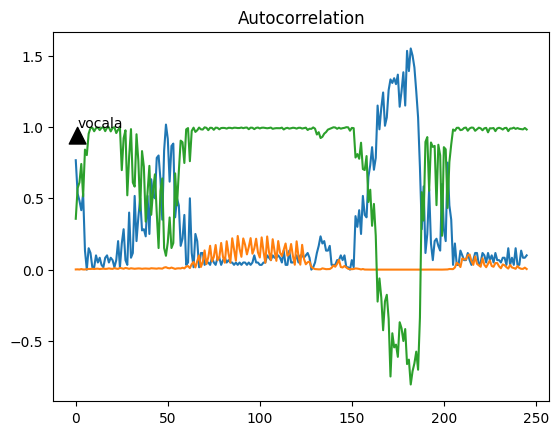

[np.float64(0.35657345658631145), np.float64(0.5710467097211473), np.float64(0.6107168786268398), np.float64(0.7404559652655054), np.float64(0.512877003108723), np.float64(0.8414092858616596), np.float64(0.8025169382121509), np.float64(0.9526101324146861), np.float64(0.9931593961739433), np.float64(0.9945746973575467), np.float64(0.9697898994018197), np.float64(0.9920198407376642), np.float64(0.9959396052813881), np.float64(0.9779562284092246), np.float64(0.9939623646417557), np.float64(0.997650742595482), np.float64(0.9705246122008456), np.float64(0.9955363525416083), np.float64(0.9972726390390443), np.float64(0.9688871827646288), np.float64(0.9931176783747598), np.float64(0.9981689612346664), np.float64(0.9571807109083329), np.float64(0.9804998969065386), np.float64(0.9958001629593444), np.float64(0.6972811770028193), np.float64(0.9211408921757409), np.float64(0.9765515654486506), np.float64(0.5209555107728042), np.float64(0.7915238549540392), np.float64(0.9848107483346799), np.float

np.float64(0.9983041750345608)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import math


audio_path_speech = r'D:\ETTI-AI_SS\day_3\resources\1D\speech_2.wav'

y, sr = librosa.load(audio_path_speech, sr=None)
print("Original sample rate:", sr, " | Shape:", y.shape)

def zero_crossing_rate(signal):
    return np.sum(np.abs(np.diff(np.sign(signal)))) / len(signal)

def rms_energy(signal):
    return np.sqrt(np.mean(signal ** 2))

def autocorrelation(signal, lag):
    return np.corrcoef(signal[:-lag], signal[lag:])[0, 1] 

zero_crossing_rate(y), rms_energy(y), autocorrelation(y, lag=1)

window_size = int(0.0025 * sr)  
step_size = window_size        

zcr_list = []
rms_list = []
autocorr_list = []
lags = 1  

for start in range(0, len(y) - window_size + 1, step_size):
    window = y[start:start + window_size]
    zcr_list.append(zero_crossing_rate(window))
    rms_list.append(rms_energy(window))
    autocorr_list.append(autocorrelation(window, lag=lags))

#plt.plot(y)

plt.plot(zcr_list)
plt.title("ZCR")

plt.plot(rms_list)
plt.title("RMS")

plt.plot(autocorr_list)
plt.title("Autocorrelation")

x = max(autocorr_list)

posititon = autocorr_list.index(x)

plt.annotate(text = 'vocala',xy=(x,autocorr_list[posititon]), xytext=(x,autocorr_list[posititon]),arrowprops=dict(facecolor='black', shrink=0.05),)

plt.show()


print(autocorr_list)
x

Exercise 2

Separați sunetul de pian de zgomotul de bormașină din fișierul 'piano_buzz.wav'. Ascultați pentru a evalua subiectiv separarea - este posibil sa nu ajungeți la un rezultat perfect.

Ar putea fi antrenat un model de AI pentru separarea celor două surse de zgomot? 


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import soundfile as sf
import math


paino_sound = r'D:\ETTI-AI_SS\day_3\resources\1D\piano_buzz.wav'

y, sr = librosa.load(paino_sound, sr=None)
print("Original sample rate:", sr, " | Shape:", y.shape)




Se da o imagine binara 
(valori 0 si 1 sau True si False) 
  -> obtineti acasta imagine binarizand
 vacile din `livestock.png`.

Creati un program care numara 
obiectele din imagine (cate vaci sunt) 
  -> (conventie: obiectele 
(vacile) vor si 1 sau True)

Programul ar trebui sa aiba inregistrate
 intr-o structura de date 
toate obiectele din magine si pentru fiecare
 obiect care pixeli ii 
apartin si care nu.

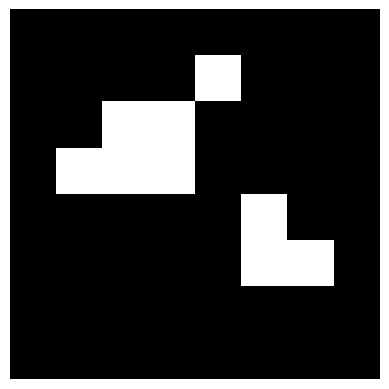

Obiectul 1: [(1, 4)]
Obiectul 2: [(2, 2), (2, 3), (3, 2)]
Obiectul 3: [(3, 1)]
Obiectul 4: [(3, 3)]
Obiectul 5: [(4, 5), (5, 5)]
Obiectul 6: [(5, 6)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

toy_image = np.zeros((8, 8))

# object 1
toy_image[2,2] = 1
toy_image[2,3] = 1
toy_image[3,3] = 1
toy_image[3,2] = 1
toy_image[2,3] = 1
toy_image[3,1] = 1
toy_image[1,4] = 1

# object 2
toy_image[5,6] = 1
toy_image[5,5] = 1
toy_image[4,5] = 1

plt.imshow(toy_image, cmap='gray')
plt.axis("off")
plt.show()

visited = np.zeros_like(toy_image)
objects = [] 

for i in range(8):
    for j in range(8):
        if toy_image[i, j] == 1 and visited[i, j] == 0:
            obj = [(i, j)]
            visited[i, j] = 1
            for ni in range(8):
                for nj in range(8):
                    if (ni, nj) in [(i-1,j), (i+1,j), (i,j-1), (i,j+1)] and toy_image[ni, nj] == 1 and visited[ni, nj] == 0:
                        obj.append((ni, nj))
                        visited[ni, nj] = 1
            objects.append(obj)

for idx, obj in enumerate(objects):
    print(f"Obiectul {idx+1}: {obj}")

    


